## Final Project - Disease Classifier

For the Final Project, 3 methods were selected to train the data. Naive Bayes, SVM, and a Fully Connect Neural Network. Of the 3, Naive Bayes was the model with the hightest accuracy of around 98 %. Hence, Naive Bayes was selected to be implement along with an AI ChatBot. 

This notebook includes the code for Naive Bayes model as well as the AI ChatBot.

In [2]:
# Importing all the Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyttsx3

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 

from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns

np.random.seed(0)

import torch
import csv
import torch.optim as optim
import torch.nn as nn
from collections import OrderedDict
from sklearn.metrics import mean_squared_error

In [3]:
# Reading in the "dataset.csv" File.
ds = pd.read_csv('./dataset.csv')

# Replacing all the Nan values with a 0 as a place holder
ds.replace(np.nan, 0, inplace=True)

#Replacing all the Symptoms(Strings) into Integers,
#with each of the symptom having a unique integer  ranging from (1 to 134)
for col in ds.columns:
    ds.replace(('itching',' skin_rash',' nodal_skin_eruptions',' continuous_sneezing',' shivering',' chills',
                ' joint_pain',' stomach_pain',' acidity',' ulcers_on_tongue',' muscle_wasting',' vomiting',
                ' burning_micturition',' spotting_ urination',' fatigue',' weight_gain',' anxiety',
                ' cold_hands_and_feets',' mood_swings',' weight_loss',' restlessness',' lethargy',' patches_in_throat',
                ' irregular_sugar_level',' cough',' high_fever',' sunken_eyes',' breathlessness',' sweating',
                ' dehydration',' indigestion',' headache',' yellowish_skin',' dark_urine',' nausea',' loss_of_appetite',
                ' pain_behind_the_eyes',' back_pain',' constipation',' abdominal_pain',' diarrhoea',' mild_fever',
                ' yellow_urine',' yellowing_of_eyes',' acute_liver_failure',' fluid_overload',' swelling_of_stomach',
                ' swelled_lymph_nodes',' malaise',' blurred_and_distorted_vision',' phlegm',' throat_irritation',
                ' redness_of_eyes',' sinus_pressure',' runny_nose',' congestion',' chest_pain',' weakness_in_limbs',
                ' fast_heart_rate',' pain_during_bowel_movements',' pain_in_anal_region',' bloody_stool',
                ' irritation_in_anus',' neck_pain',' dizziness',' cramps',' bruising',' obesity',' swollen_legs',
                ' swollen_blood_vessels',' puffy_face_and_eyes',' enlarged_thyroid',' brittle_nails',
                ' swollen_extremeties',' excessive_hunger',' extra_marital_contacts',' drying_and_tingling_lips',
                ' slurred_speech',' knee_pain',' hip_joint_pain',' muscle_weakness',' stiff_neck',' swelling_joints',
                ' movement_stiffness',' spinning_movements',' loss_of_balance',' unsteadiness',
                ' weakness_of_one_body_side',' loss_of_smell',' badder_discomfort',' foul_smell_of urine',
                ' continuous_feel_of_urine',' passage_of_gases',' internal_itching',' toxic_look_(typhos)',' depression',
                ' irritability',' muscle_pain',' altered_sensorium',' red_spots_over_body',' belly_pain',
                ' abnormal_menstruation',' dischromic _patches',' watering_from_eyes',' increased_appetite',' polyuria',
                ' family_history',' mucoid_sputum',' rusty_sputum',' lack_of_concentration',' visual_disturbances',
                ' receiving_blood_transfusion',' receiving_unsterile_injections',' coma',' stomach_bleeding',
                ' distention_of_abdomen',' history_of_alcohol_consumption',' fluid_overload',' blood_in_sputum',
                ' prominent_veins_on_calf',' palpitations',' painful_walking',' pus_filled_pimples',' blackheads',
                ' scurring',' skin_peeling',' silver_like_dusting',' small_dents_in_nails',' inflammatory_nails',
                ' blister',' red_sore_around_nose',' yellow_crust_ooze',' prognosis',' bladder_discomfort'), 
               (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,22,23,24,25,26,27,28,29,30,31,
                32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,
                66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,
                100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134),
                inplace=True)


In [4]:
##Replacing all the Diseases(Strings) into Integers,
#with each of the disease having a unique integer  ranging from (1 to 41)
ds.Disease.replace(('Fungal infection','Allergy','GERD','Chronic cholestasis','Drug Reaction','Peptic ulcer diseae',
                    'AIDS','Diabetes ','Gastroenteritis','Bronchial Asthma','Hypertension ','Migraine',
                    'Cervical spondylosis','Paralysis (brain hemorrhage)','Jaundice','Malaria','Chicken pox','Dengue',
                    'Typhoid','hepatitis A','Hepatitis B','Hepatitis C','Hepatitis D','Hepatitis E',
                    'Alcoholic hepatitis','Tuberculosis','Common Cold','Pneumonia','Dimorphic hemmorhoids(piles)',
                    'Heart attack','Varicose veins','Hypothyroidism','Hyperthyroidism','Hypoglycemia',
                    'Osteoarthristis','Arthritis','(vertigo) Paroymsal  Positional Vertigo','Acne',
                    'Urinary tract infection','Psoriasis','Impetigo'),
                   (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
                    21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41), inplace=True)

In [31]:
# Checking the Dataset for any Discrepancies
ds.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,1,1,2,3,103,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,3,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,3,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,2,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Splitting the Data into X - Inputs (Symptoms) and Y - Output (Disease)
N = ds.shape[1]
X = ds.values[:,1 :N]
Y = ds.iloc[:, 0].values

In [32]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

In [33]:
# Naive Bayes Classifier
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_val)

# Evaluation of the Model for Accuracy, Precision, and Recall
accuracy = metrics.accuracy_score(Y_val, Y_pred)
precision = metrics.precision_score(Y_val, Y_pred, average = 'weighted')
recall = metrics.recall_score(Y_val, Y_pred, average = 'macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.9664634146341463
Precision: 0.9736031352674108
Recall: 0.9672151525863085


In [23]:
print(metrics.classification_report(Y_val, Y_pred))

              precision    recall  f1-score   support

           1       0.73      1.00      0.84        24
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        27
           4       1.00      0.86      0.92        21
           5       1.00      0.67      0.80        27
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        22
           8       1.00      1.00      1.00        22
           9       0.93      1.00      0.96        26
          10       1.00      1.00      1.00        28
          11       0.94      0.85      0.89        20
          12       1.00      1.00      1.00        29
          13       1.00      1.00      1.00        27
          14       0.86      1.00      0.92        30
          15       1.00      1.00      1.00        26
          16       1.00      1.00      1.00        25
          17       1.00      1.00      1.00        21
          18       1.00    

In [24]:
Confusion_Matrix = metrics.confusion_matrix(Y_val, Y_pred)
print(Confusion_Matrix)

[[24  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  0 27 ...  0  0  0]
 ...
 [ 0  0  0 ... 18  0  0]
 [ 0  0  0 ...  0 18  0]
 [ 0  0  0 ...  0  0 25]]


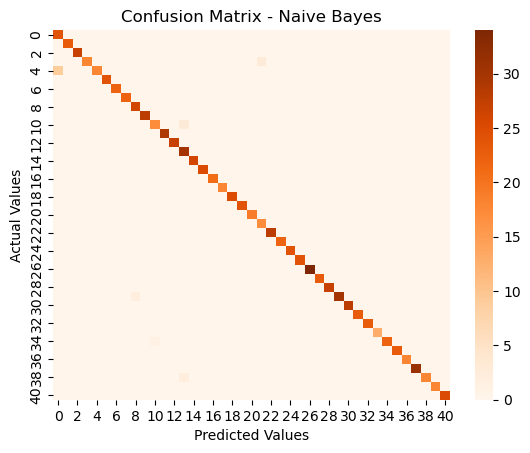

In [37]:
#Generation of a Confusion Matrix Plot
# Plotting the Binary Classifier Model
class_names = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
               26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names);
plt.yticks(tick_marks, class_names);

# Representation of the Binary Classifier using a Confusion Matrix
sns.heatmap(pd.DataFrame(Confusion_Matrix), cmap = "Oranges", fmt = "g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix - Naive Bayes");

In [10]:
severityDictionary=dict()
description_list = dict()
precautionDictionary=dict()

In [11]:
def getDescription():
    global description_list
    with open('symptom_Description.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _description={row[0]:row[1]}
            description_list.update(_description)

In [12]:
def sec_predict(symptoms_exp):
    X = df.iloc[:, :-1]
    y = df['prognosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
    rf_clf = DecisionTreeClassifier()
    rf_clf.fit(X_train, y_train)

    symptoms_dict = {symptom: index for index, symptom in enumerate(X)}
    input_vector = np.zeros(len(symptoms_dict))
    for item in symptoms_exp:
      input_vector[[symptoms_dict[item]]] = 1

    return rf_clf.predict([input_vector])

In [13]:
def getInfo():
    ChatNAME=('Norm')
    print("-------------------------------------------------Disease Classifier ChatBot-------------------------------------------------")
    print(ChatNAME+": Welcome to the Niner Disease Classifier.")
    print("\n"+ChatNAME+": What is your Name? \t\t\t\t\t\t\t\t",end="-> Patient: ")
    name=input("")
    print(ChatNAME+": "+"Hello, ",name+".")

In [14]:
def getSymp():
    ChatNAME=('Norm')
    # Creating an empty list
    patient_symptoms = []

    # number of elements as input
    print("\n"+ChatNAME+": "+"How many Symmptoms do you have? \t\t\t\t\t\t\t",end="-> Patient: ")
    n = int(input())
    print("\n\t\t\t\t    -------Enter symptoms one at a time below.-------")
    

    # iterating till the range
    for i in range(0, n):
        symptoms = input()
        new_symptoms= symptoms.replace(" ","_")
        new_symptoms_1=new_symptoms.lower()

        patient_symptoms.append(new_symptoms_1) # adding the elements

    #print(patient_symptoms)
    #print(type(patient_symptoms))

    new_patient_symptoms=' '.join(patient_symptoms)
    #print(new_patient_symptoms)

    new_patient_symptoms=(new_patient_symptoms.replace('itching', '1').replace('skin_rash','2')
                          .replace('nodal_skin_eruptions', '3').replace('continuous_sneezing', '4').replace('shivering', '5')
                          .replace('chills', '6').replace('joint_pain', '7').replace('stomach_pain', '8').replace('acidity', '9')
                          .replace('ulcers_on_tongue', '10').replace('muscle_wasting', '11').replace('vomiting', '12')
                          .replace('burning_micturition', '13').replace('spotting_urination', '14').replace('fatigue', '15')
                          .replace('weight_gain', '16').replace('anxiety', '17').replace('cold_hands_and_feets', '18')
                          .replace('mood_swings', '19').replace('weight_loss', '20').replace('restlessness', '21')
                          .replace('lethargy', '22').replace('patches_in_throat', '23').replace('irregular_sugar_level', '24')
                          .replace('cough', '25').replace('high_fever', '26').replace('sunken_eyes', '27')
                          .replace('breathlessness', '28').replace('sweating', '29').replace('dehydration', '30')
                          .replace('indigestion', '31').replace('headache', '32').replace('yellowish_skin', '33')
                          .replace('dark_urine', '34').replace('nausea', '35').replace('loss_of_appetite', '36')
                          .replace('pain_behind_the_eyes', '37').replace('back_pain', '38').replace('constipation', '39')
                          .replace('abdominal_pain', '40').replace('diarrhoea', '41').replace('mild_fever', '42')
                          .replace('yellow_urine', '43').replace('yellowing_of_eyes', '44').replace('acute_liver_failure', '45')
                          .replace('fluid_overload', '46').replace('swelling_of_stomach', '47')
                          .replace('swelled_lymph_nodes', '48').replace('malaise', '49')
                          .replace('blurred_and_distorted_vision', '50').replace('phlegm', '51')
                          .replace('throat_irritation', '52').replace('redness_of_eyes', '53').replace('sinus_pressure', '54')
                          .replace('runny_nose', '55').replace('congestion', '56').replace('chest_pain', '57')
                          .replace('weakness_in_limbs', '58').replace('fast_heart_rate', '59')
                          .replace('pain_during_bowel_movements', '60').replace('pain_in_anal_region', '61')
                          .replace('bloody_stool', '62').replace('irritation_in_anus', '63').replace('neck_pain', '64')
                          .replace('dizziness', '65').replace('cramps', '66').replace('bruising', '67').replace('obesity', '68')
                          .replace('swollen_legs', '69').replace('swollen_blood_vessels', '70')
                          .replace('puffy_face_and_eyes', '71').replace('enlarged_thyroid', '72').replace('brittle_nails', '73')
                          .replace('swollen_extremeties', '74').replace('excessive_hunger', '75')
                          .replace('extra_marital_contacts', '76').replace('drying_and_tingling_lips', '77')
                          .replace('slurred_speech', '78').replace('knee_pain', '79').replace('hip_joint_pain', '80')
                          .replace('muscle_weakness', '81').replace('stiff_neck', '82').replace('swelling_joints', '83')
                          .replace('movement_stiffness', '84').replace('spinning_movements', '85')
                          .replace('loss_of_balance', '86').replace('unsteadiness', '87')
                          .replace('weakness_of_one_body_side', '88').replace('loss_of_smell', '89')
                          .replace('badder_discomfort', '90').replace('foul_smell_of urine', '91')
                          .replace('continuous_feel_of_urine', '92').replace('passage_of_gases', '93')
                          .replace('internal_itching', '94').replace('toxic_look_(typhos)', '95').replace('depression', '96')
                          .replace('irritability', '97').replace('muscle_pain', '98').replace('altered_sensorium', '99')
                          .replace('red_spots_over_body', '100').replace('belly_pain', '101')
                          .replace('abnormal_menstruation', '102').replace('dischromic _patches', '103')
                          .replace('watering_from_eyes', '104').replace('increased_appetite', '105').replace('polyuria', '106')
                          .replace('family_history', '107').replace('mucoid_sputum', '108').replace('rusty_sputum', '109')
                          .replace('lack_of_concentration', '110').replace('visual_disturbances', '111')
                          .replace('receiving_blood_transfusion', '112').replace('receiving_unsterile_injections', '113')
                          .replace('coma', '114').replace('stomach_bleeding', '115').replace('distention_of_abdomen', '116')
                          .replace('history_of_alcohol_consumption', '117').replace('fluid_overload', '118')
                          .replace('blood_in_sputum', '119').replace('prominent_veins_on_calf', '120')
                          .replace('palpitations', '121').replace('painful_walking', '122').replace('pus_filled_pimples', '123')
                          .replace('blackheads', '124').replace('scurring', '125').replace('skin_peeling', '126')
                          .replace('silver_like_dusting', '127').replace('small_dents_in_nails', '128')
                          .replace('inflammatory_nails', '129').replace('blister', '130').replace('red_sore_around_nose', '131')
                          .replace('yellow_crust_ooze', '132').replace('prognosis', '133').replace('bladder_discomfort', ' 134 '))


    def Convert(string):
        li = list(string.split(" "))
        return li
    new = Convert(new_patient_symptoms)
    new.sort()

    new=' '.join(new)
    #print(new)
    #print(type(new))
    final = new.split()
    
    new_Y = np.array(final)
    full = len(new_Y)
    empty = 17 - full
    
    in_symptoms = np.zeros(17)
    
    for i in range(full):
        in_symptoms[i] = new_Y[i]
      
    in_symptoms = in_symptoms.reshape(1, -1)
    #print(new_Y)
    #print(type(new_Y))
    pred_diag = classifier.predict(in_symptoms)
    pred_diag_1 = pred_diag.tolist()
    #print(type(pred_diag_1))
    #print(pred_diag_1)
    pred_diag_1 =' '.join(str(e) for e in pred_diag_1)
    dis  = (int(pred_diag_1))
    #print(dis)
    #print(type(dis))
    #print(pred_diag_1)
    #print(type(pred_diag_1))
    if pred_diag_1 == '1':
        pred_diag_1=pred_diag_1.replace('1','Fungal Infection')
    elif pred_diag_1 == '2':
        pred_diag_1 =pred_diag_1.replace('2','Allergy')
    elif pred_diag_1 == '3':
        pred_diag_1 =pred_diag_1.replace('3', 'GERD')
    elif pred_diag_1 == '4':
        pred_diag_1 =pred_diag_1.replace('4', 'Chronic cholestasis')
    elif pred_diag_1 == '5':
        pred_diag_1 =pred_diag_1.replace('5', 'Drug Reaction')
    elif pred_diag_1 == '6':
        pred_diag_1 =pred_diag_1.replace('6', 'Peptic ulcer diseae')
    elif pred_diag_1 == '7':
        pred_diag_1 =pred_diag_1.replace('7', 'AIDS')
    elif pred_diag_1 == '8':
        pred_diag_1 =pred_diag_1.replace('8', 'Diabetes')
    elif pred_diag_1 == '9':
        pred_diag_1 =pred_diag_1.replace('9', 'Gastroenteritis')
    elif pred_diag_1 == '10':
        pred_diag_1 =pred_diag_1.replace('10', 'Bronchial Asthma')
    elif pred_diag_1 == '11':
        pred_diag_1 =pred_diag_1.replace('11', 'Hypertension')
    elif pred_diag_1 == '12':
        pred_diag_1 =pred_diag_1_1.replace('12', 'Migraine')
    elif pred_diag_1 == '13':
        pred_diag_1 =pred_diag_1.replace('13', 'Cervical spondylosis')
    elif pred_diag_1 == '14':
        pred_diag_1 =pred_diag_1.replace('14', 'Paralysis (brain hemorrhage)')
    elif pred_diag_1 == '15':
        pred_diag_1 =pred_diag_1.replace('15', 'Jaundice')
    elif pred_diag_1 == '16':
        pred_diag_1 =pred_diag_1.replace('16', 'Malaria')
    elif pred_diag_1 == '17':
        pred_diag_1 =pred_diag_1.replace('17', 'Chicken pox')
    elif pred_diag_1 == '18':
        pred_diag_1 =pred_diag_1.replace('18', 'Dengue')
    elif pred_diag_1 == '19':
        pred_diag_1 =pred_diag_1.replace('19', 'Typhoid')
    elif pred_diag_1 == '20':
        pred_diag_1 =pred_diag_1.replace('20', 'hepatitis A')
    elif pred_diag_1 == '21':
        pred_diag_1 =pred_diag_1.replace('21', 'Hepatitis B')
    elif pred_diag_1 == '22':
        pred_diag_1 =pred_diag_1.replace('22', 'Hepatitis C')
    elif pred_diag_1 == '23':
        pred_diag_1 =pred_diag_1.replace('23', 'Hepatitis D')
    elif pred_diag_1 == '24':
        pred_diag_1 =pred_diag_1.replace('24', 'Hepatitis E')
    elif pred_diag_1 == '25':
        pred_diag_1 =pred_diag_1.replace('25', 'Alcoholic hepatitis')
    elif pred_diag_1 == '26':
        pred_diag_1 =pred_diag_1.replace('26', 'Tuberculosis')
    elif pred_diag_1 == '27':
        pred_diag_1 =pred_diag_1.replace('27', 'Common Cold')
    elif pred_diag_1 == '28':
        pred_diag_1 =pred_diag_1.replace('28', 'Pneumonia')
    elif pred_diag_1 == '29':
        pred_diag_1 =pred_diag_1.replace('29', 'Dimorphic hemmorhoids(piles)')
    elif pred_diag_1 == '30':
        pred_diag_1 =pred_diag_1.replace('30', 'Heart attack')
    elif pred_diag_1 == '31':
        pred_diag_1 =pred_diag_1.replace('31', 'Varicose veins')
    elif pred_diag_1 == '32':
        pred_diag_1 =pred_diag_1.replace('32', 'Hypothyroidism')
    elif pred_diag_1 == '33':
        pred_diag_1 =pred_diag_1.replace('33', 'Hyperthyroidism')
    elif pred_diag_1 == '34':
        pred_diag_1 =pred_diag_1.replace('34', 'Hypoglycemia')
    elif pred_diag_1 == '35':
        pred_diag_1 =pred_diag_1.replace('35', 'Osteoarthristis')
    elif pred_diag_1 == '36':
        pred_diag_1 =pred_diag_1.replace('36', 'Arthritis')
    elif pred_diag_1 == '37':
        pred_diag_1 =pred_diag_1.replace('37', '(vertigo) Paroymsal  Positional Vertigo')
    elif pred_diag_1 == '38':
        pred_diag_1 =pred_diag_1.replace('38', 'Acne')
    elif pred_diag_1 == '39':
        pred_diag_1 =pred_diag_1.replace('39', 'Urinary tract infection')
    elif pred_diag_1 == '40':
        pred_diag_1 =pred_diag_1.replace('40', 'Psoriasis')
    elif pred_diag_1 == '41':
        pred_diag_1 =pred_diag_1.replace('41', 'Impetigo')          
                 
    
    import itertools
    import threading
    import time
    import sys
    def process():
        print("\n\t\t\t\t    -------------------------------------------------")
        print("\t\t\t\t\t\t\t Processing:")
        #animation = ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"]
        animation = ["■□□□□□□□□□ 10%","■■□□□□□□□□ 20%", "■■■□□□□□□□ 30%", "■■■■□□□□□□ 40%", "■■■■■□□□□□ 50%",
                     "■■■■■■□□□□ 60%", "■■■■■■■□□□ 70%","■■■■■■■■□□ 80%", "■■■■■■■■■□ 90%", "■■■■■■■■■■ 100%"]

        for i in range(len(animation)):
            time.sleep(0.5)
            sys.stdout.write("\r" + "\t\t\t\t\t\t\t"+animation[i % len(animation)])
            sys.stdout.flush()
        print("\n\t\t\t\t\t\t     Processing Complete:")
        print("\t\t\t\t    -------------------------------------------------")
        print("\n")
    
    process()
    import math
    print(ChatNAME+": Your predeicted disease is: {} with {}% accuracy.".format(pred_diag_1, round(accuracy*100, 2)))
    
    def dis_desc(dis):
        # Read in data file.
        desc = pd.read_csv('./symptom_Description.csv')

        # Convert descriptions to an array.
        D = desc.iloc[:, 1].values

        # Print description at index of predicted disease.
        print("\n"+ChatNAME+": Disease Description:")
        print("\t"+D[dis-1])
        
    def next_steps(dis):
        # Read in data file.
        prec = pd.read_csv('./symptom_precaution.csv')

        # Convert descriptions to an array. 
        P = prec.iloc[:,1:5].values

        # Print the suggested next steps at index of predicted disease.
        print("\n"+ChatNAME+": Suggested Precautions:")
        for i in range(0,4):
            out = P[dis-1,i]
            print("\t{}. {}".format(i+1, out))
    
    #print(dis)
    print("\n"+ChatNAME+": Would you like a description of your disease?\t\t\t\t\t",end="-> Patient: ")
    ans_1= input()
    ans_1= ans_1.lower()
    if ans_1 == 'yes':
        dis_desc(dis)
    elif ans_1 == 'no':
        print("\n"+ChatNAME+": Would you like suggested precautions for your disease?\t\t\t\t",end="-> Patient: ")
        ans_2=input()
        ans_2=ans_2.lower()
        if ans_2 == 'yes':
            next_steps(dis)
        if ans_2 == 'no':
            return
        
        
        
    print("\n"+ChatNAME+": Would you like suggested precautions for your disease?\t\t\t\t",end="-> Patient: ")
    ans_2=input()
    ans_2=ans_2.lower()
    if ans_2 == 'yes':
        next_steps(dis)
    if ans_2 == 'no':
        return
          
import os

In [15]:
import webbrowser
def end():
    ChatNAME=('Norm')
    print("\n"+ChatNAME+": Thank you for using the Disease Classifier ChatBot.")
    print(ChatNAME+": Would you like to schedule a appointment at the Niner Health Center? \t\t",end="-> Patient: ")
    ans = input()
    ans = ans.lower()
    if ans == 'yes':
          webbrowser.open("https://uncc.medicatconnect.com/Shibboleth.sso/Login?entityID=https%3A%2F%2Fwebauth.uncc.edu%2Fidp%2Fshibboleth")
    elif ans == 'no':
        print("\n"+ChatNAME+": Have a good day, goodbye.")

![banner.gif](banner.gif)


In [16]:
getInfo(),getSymp(),end()
print("----------------------------------------------------------------------------------------------------------------------------")

-------------------------------------------------Disease Classifier ChatBot-------------------------------------------------
Norm: Welcome to the Niner Disease Classifier.

Norm: What is your Name? 								-> Patient: noah
Norm: Hello,  noah.

Norm: How many Symmptoms do you have? 							-> Patient: 1

				    -------Enter symptoms one at a time below.-------
itching

				    -------------------------------------------------
							 Processing:
							■■■■■■■■■■ 100%
						     Processing Complete:
				    -------------------------------------------------


Norm: Your predeicted disease is: Fungal Infection with 97.97% accuracy.

Norm: Would you like a description of your disease?					-> Patient: yes

Norm: Disease Description:
	In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in the human body. Like 